In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import json
from sklearn import preprocessing
from sklearn.cluster import KMeans
from operator import itemgetter
import seaborn as sns
import Orange

Supp Conf Lift Rule
 0.3  1.0  3.0  night_weekend_stat2_out_tmp_low -> night_weekend_stat1_out_tmp_low
 0.3  1.0  3.0  night_weekend_stat1_out_tmp_low -> night_weekend_stat2_out_tmp_low
 0.3  1.0  2.9  night_weekend_tot_chi_kw_high -> night_weekend_ch_sys_kw_high
 0.3  1.0  2.9  night_weekend_ch_sys_kw_high -> night_weekend_tot_chi_kw_high
 0.3  0.9  2.6  night_weekend_tot_chi_kw_high -> night_weekend_con_pump_kw_high
 0.3  0.9  2.6  night_weekend_con_pump_kw_high -> night_weekend_tot_chi_kw_high
 0.3  0.9  2.6  night_weekend_ch_sys_kw_high -> night_weekend_con_pump_kw_high
 0.3  0.9  2.6  night_weekend_con_pump_kw_high -> night_weekend_ch_sys_kw_high
 0.3  1.0  2.9  night_weekend_stat2_out_tmp_mid -> night_weekend_stat1_out_tmp_mid
 0.3  1.0  2.9  night_weekend_stat1_out_tmp_mid -> night_weekend_stat2_out_tmp_mid
 0.3  0.9  2.9  night_weekend_ch_sys_kw_low -> night_weekend_tot_chi_kw_low
 0.3  0.9  2.9  night_weekend_tot_chi_kw_low -> night_weekend_ch_sys_kw_low
 0.3  0.9  2.8  night_

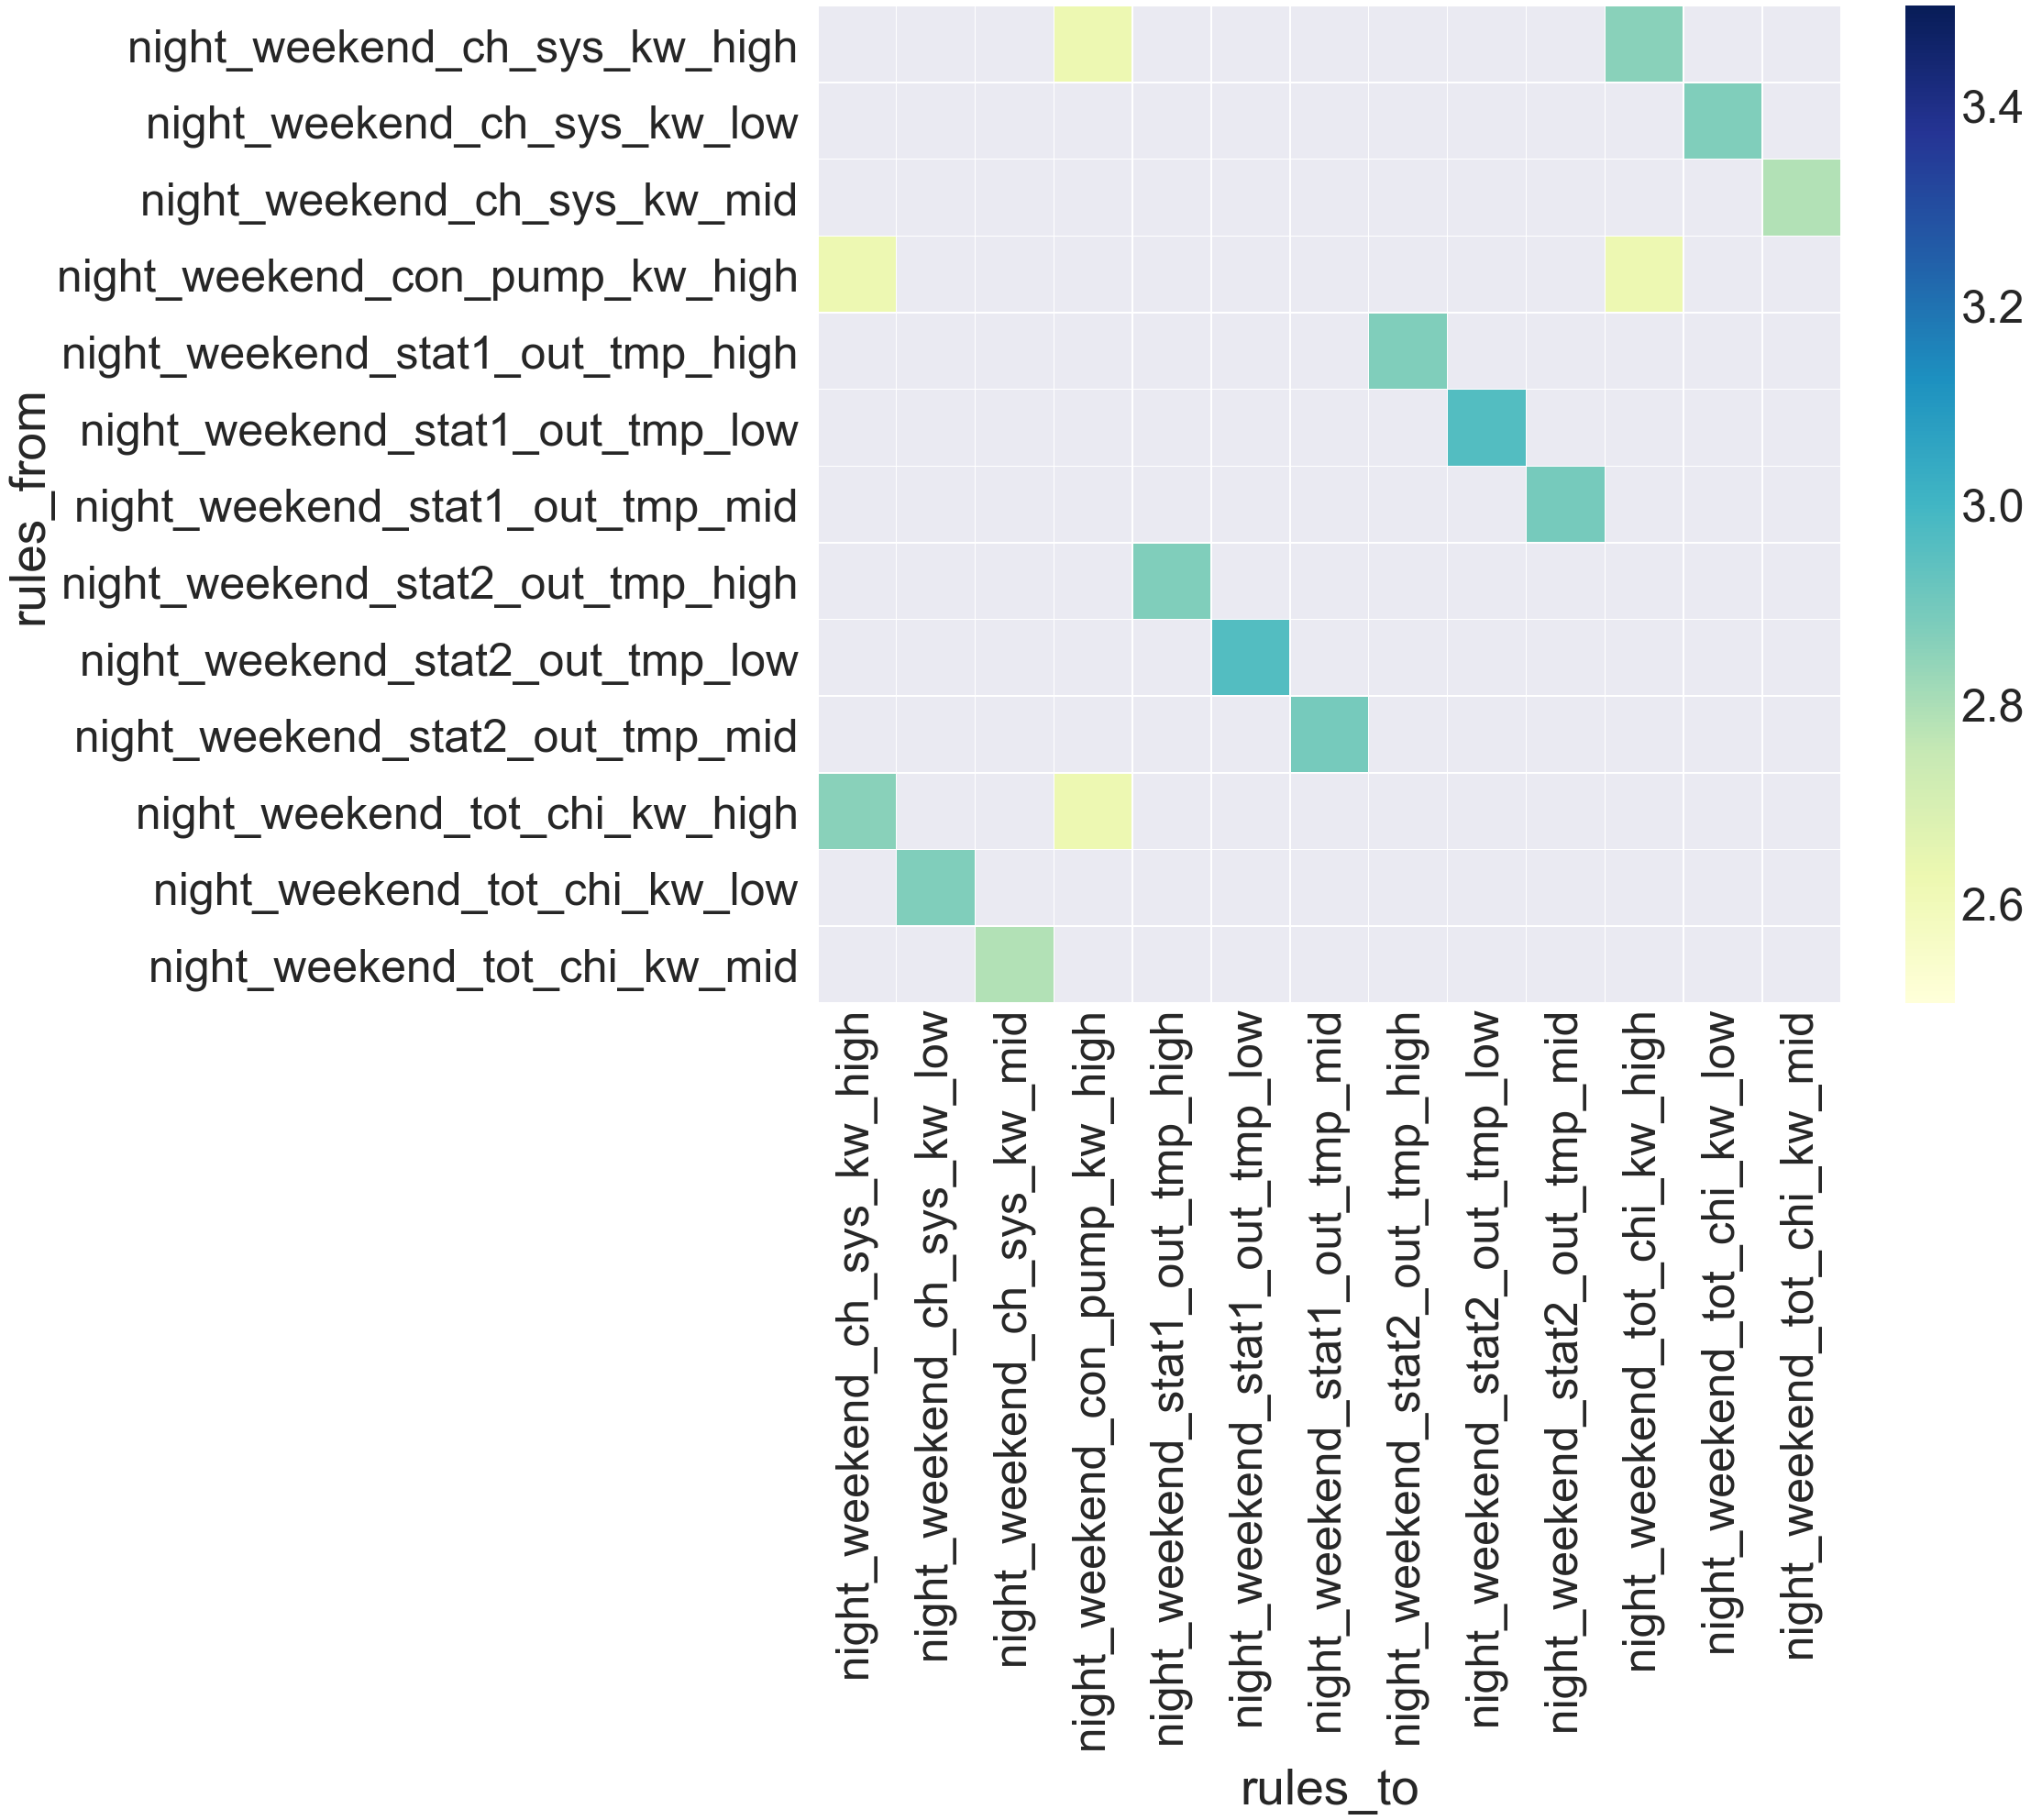

In [9]:
### SAX_night_weekend_cp_sys.basket
data = Orange.data.Table('SAX_night_weekend_cp_sys.basket')
rules = Orange.associate.AssociationRulesSparseInducer(data, support=0.3)
print "%4s %4s %4s %4s" % ("Supp", "Conf", "Lift", "Rule")
for r in rules:
    print "%4.1f %4.1f %4.1f  %s" % (r.support, r.confidence, r.lift, r)

result_rules = [(r.support, r.confidence, r.lift, str(r).split('->')) for r in rules]
result_rules = sorted(result_rules, key=itemgetter(3))
rules_from = []
rules_to = []
rules_lift = []
for i in range(len(result_rules)):
    rules_from.append(result_rules[i][3][0])
    rules_to.append(result_rules[i][3][1])
    rules_lift.append(result_rules[i][2])
whole_rules_df = pd.DataFrame({'rules_from':rules_from,
                              'rules_to':rules_to,
                              'rules_lift':rules_lift})
whole_pt = whole_rules_df.pivot_table(index='rules_from', columns='rules_to', values='rules_lift', aggfunc=np.sum)
f, ax = plt.subplots(figsize=(25,20))
sns.set(font_scale=5)
one_heat = sns.heatmap(whole_pt,fmt="d",cmap='YlGnBu',linewidths=.5, ax=ax,vmin=2.5,vmax=3.5)
one_heat.get_figure().savefig('one_SAX_night_weekend_cp_sys.png',bbox_inches="tight")

In [3]:
### one to one rules
one_one_rules = []
for i in range(len(result_rules)):
    if(len(result_rules[i][3][0].split(' '))==2 and len(result_rules[i][3][1].split(' '))==2):
        one_one_rules.append(result_rules[i])
print(one_one_rules)

[(0.3031732439994812, 0.8915510773658752, 2.621812343597412, ['night_weekend_ch_sys_kw_high ', ' night_weekend_con_pump_kw_high']), (0.3306174874305725, 0.9722572565078735, 2.859147548675537, ['night_weekend_ch_sys_kw_high ', ' night_weekend_tot_chi_kw_high']), (0.3130360245704651, 0.948051929473877, 2.8712430000305176, ['night_weekend_ch_sys_kw_low ', ' night_weekend_tot_chi_kw_low']), (0.3031732439994812, 0.9193758368492126, 2.7880160808563232, ['night_weekend_ch_sys_kw_mid ', ' night_weekend_tot_chi_kw_mid']), (0.3031732439994812, 0.8915510773658752, 2.621812343597412, ['night_weekend_con_pump_kw_high ', ' night_weekend_ch_sys_kw_high']), (0.3031732439994812, 0.8915510773658752, 2.621812343597412, ['night_weekend_con_pump_kw_high ', ' night_weekend_tot_chi_kw_high']), (0.3323327600955963, 0.9773013591766357, 2.87398099899292, ['night_weekend_stat1_out_tmp_high ', ' night_weekend_stat2_out_tmp_high']), (0.322898805141449, 0.9779220819473267, 2.96170711517334, ['night_weekend_stat1_ou

Supp Conf Lift Rule
 0.3  1.0  3.0  night_weekday_stat2_out_tmp_low -> night_weekday_stat1_out_tmp_low
 0.3  1.0  3.0  night_weekday_stat1_out_tmp_low -> night_weekday_stat2_out_tmp_low
 0.3  1.0  2.9  night_weekday_stat2_out_tmp_mid -> night_weekday_stat1_out_tmp_mid
 0.3  1.0  2.9  night_weekday_stat1_out_tmp_mid -> night_weekday_stat2_out_tmp_mid
 0.3  0.9  2.9  night_weekday_tot_chi_kw_low -> night_weekday_ch_sys_kw_low
 0.3  1.0  2.9  night_weekday_ch_sys_kw_low -> night_weekday_tot_chi_kw_low
 0.3  0.9  2.8  night_weekday_tot_chi_kw_mid -> night_weekday_ch_sys_kw_mid
 0.3  0.9  2.8  night_weekday_ch_sys_kw_mid -> night_weekday_tot_chi_kw_mid
 0.3  1.0  2.9  night_weekday_stat2_out_tmp_high -> night_weekday_stat1_out_tmp_high
 0.3  1.0  2.9  night_weekday_stat1_out_tmp_high -> night_weekday_stat2_out_tmp_high
 0.3  1.0  2.9  night_weekday_tot_chi_kw_high -> night_weekday_ch_sys_kw_high
 0.3  1.0  2.9  night_weekday_ch_sys_kw_high -> night_weekday_tot_chi_kw_high


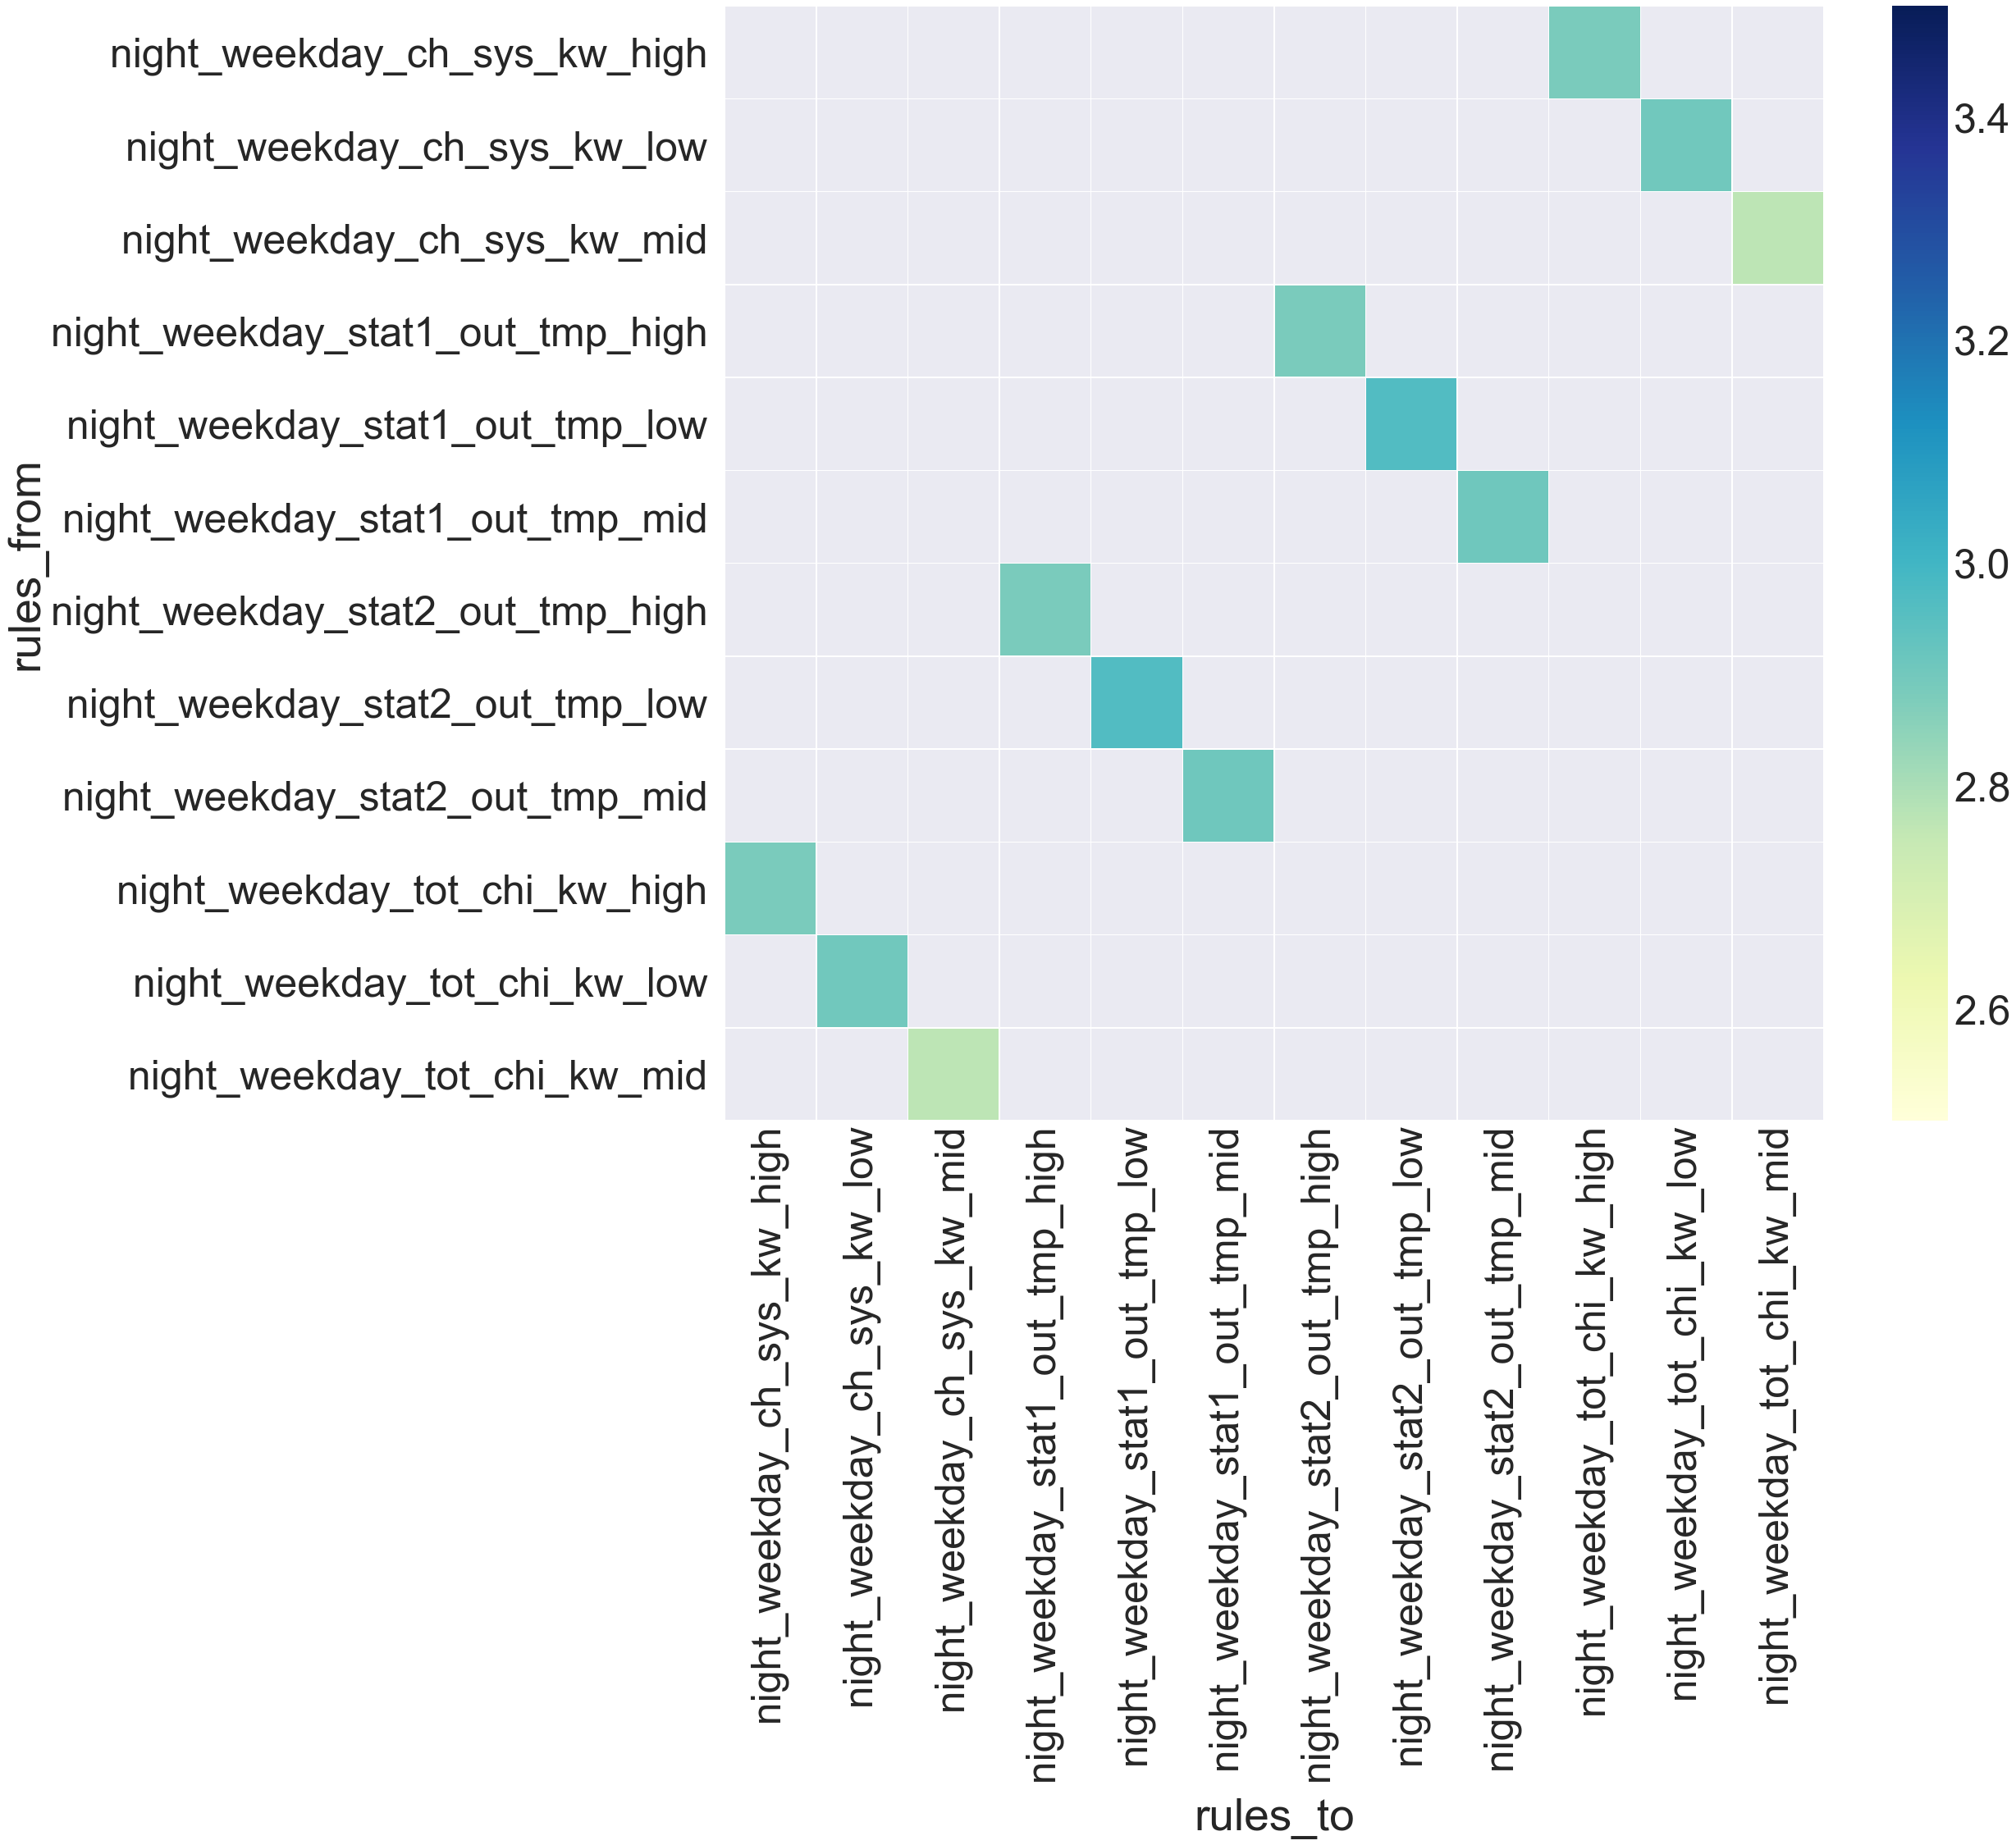

In [4]:
### SAX_night_weekday_cp_sys.basket
data = Orange.data.Table('SAX_night_weekday_cp_sys.basket')
rules = Orange.associate.AssociationRulesSparseInducer(data, support=0.3)
print "%4s %4s %4s %4s" % ("Supp", "Conf", "Lift", "Rule")
for r in rules:
    print "%4.1f %4.1f %4.1f  %s" % (r.support, r.confidence, r.lift, r)

result_rules = [(r.support, r.confidence, r.lift, str(r).split('->')) for r in rules]
result_rules = sorted(result_rules, key=itemgetter(3))
rules_from = []
rules_to = []
rules_lift = []
for i in range(len(result_rules)):
    rules_from.append(result_rules[i][3][0])
    rules_to.append(result_rules[i][3][1])
    rules_lift.append(result_rules[i][2])
whole_rules_df = pd.DataFrame({'rules_from':rules_from,
                              'rules_to':rules_to,
                              'rules_lift':rules_lift})
whole_pt = whole_rules_df.pivot_table(index='rules_from', columns='rules_to', values='rules_lift', aggfunc=np.sum)
f, ax = plt.subplots(figsize=(30,25))
sns.set(font_scale=5)
one_heat = sns.heatmap(whole_pt,fmt="d",cmap='YlGnBu',linewidths=.5, ax=ax,vmin=2.5,vmax=3.5)
one_heat.get_figure().savefig('one_SAX_night_weekday_cp_sys.png',bbox_inches="tight")

Supp Conf Lift Rule
 0.3  1.0  2.8  day_weekday_tot_chi_kw_high -> day_weekday_ch_sys_kw_high
 0.3  1.0  2.8  day_weekday_ch_sys_kw_high -> day_weekday_tot_chi_kw_high
 0.3  0.9  2.9  day_weekday_tot_chi_kw_high -> day_weekday_ch_sys_kw_high day_weekday_con_pump_kw_high
 0.3  0.9  2.7  day_weekday_tot_chi_kw_high day_weekday_ch_sys_kw_high -> day_weekday_con_pump_kw_high
 0.3  1.0  2.9  day_weekday_tot_chi_kw_high day_weekday_con_pump_kw_high -> day_weekday_ch_sys_kw_high
 0.3  0.9  2.9  day_weekday_ch_sys_kw_high -> day_weekday_tot_chi_kw_high day_weekday_con_pump_kw_high
 0.3  1.0  2.9  day_weekday_ch_sys_kw_high day_weekday_con_pump_kw_high -> day_weekday_tot_chi_kw_high
 0.3  0.9  2.7  day_weekday_con_pump_kw_high -> day_weekday_tot_chi_kw_high day_weekday_ch_sys_kw_high
 0.3  0.9  2.6  day_weekday_tot_chi_kw_high -> day_weekday_con_pump_kw_high
 0.3  0.9  2.6  day_weekday_con_pump_kw_high -> day_weekday_tot_chi_kw_high
 0.3  0.9  2.7  day_weekday_ch_sys_kw_high -> day_weekday_con_

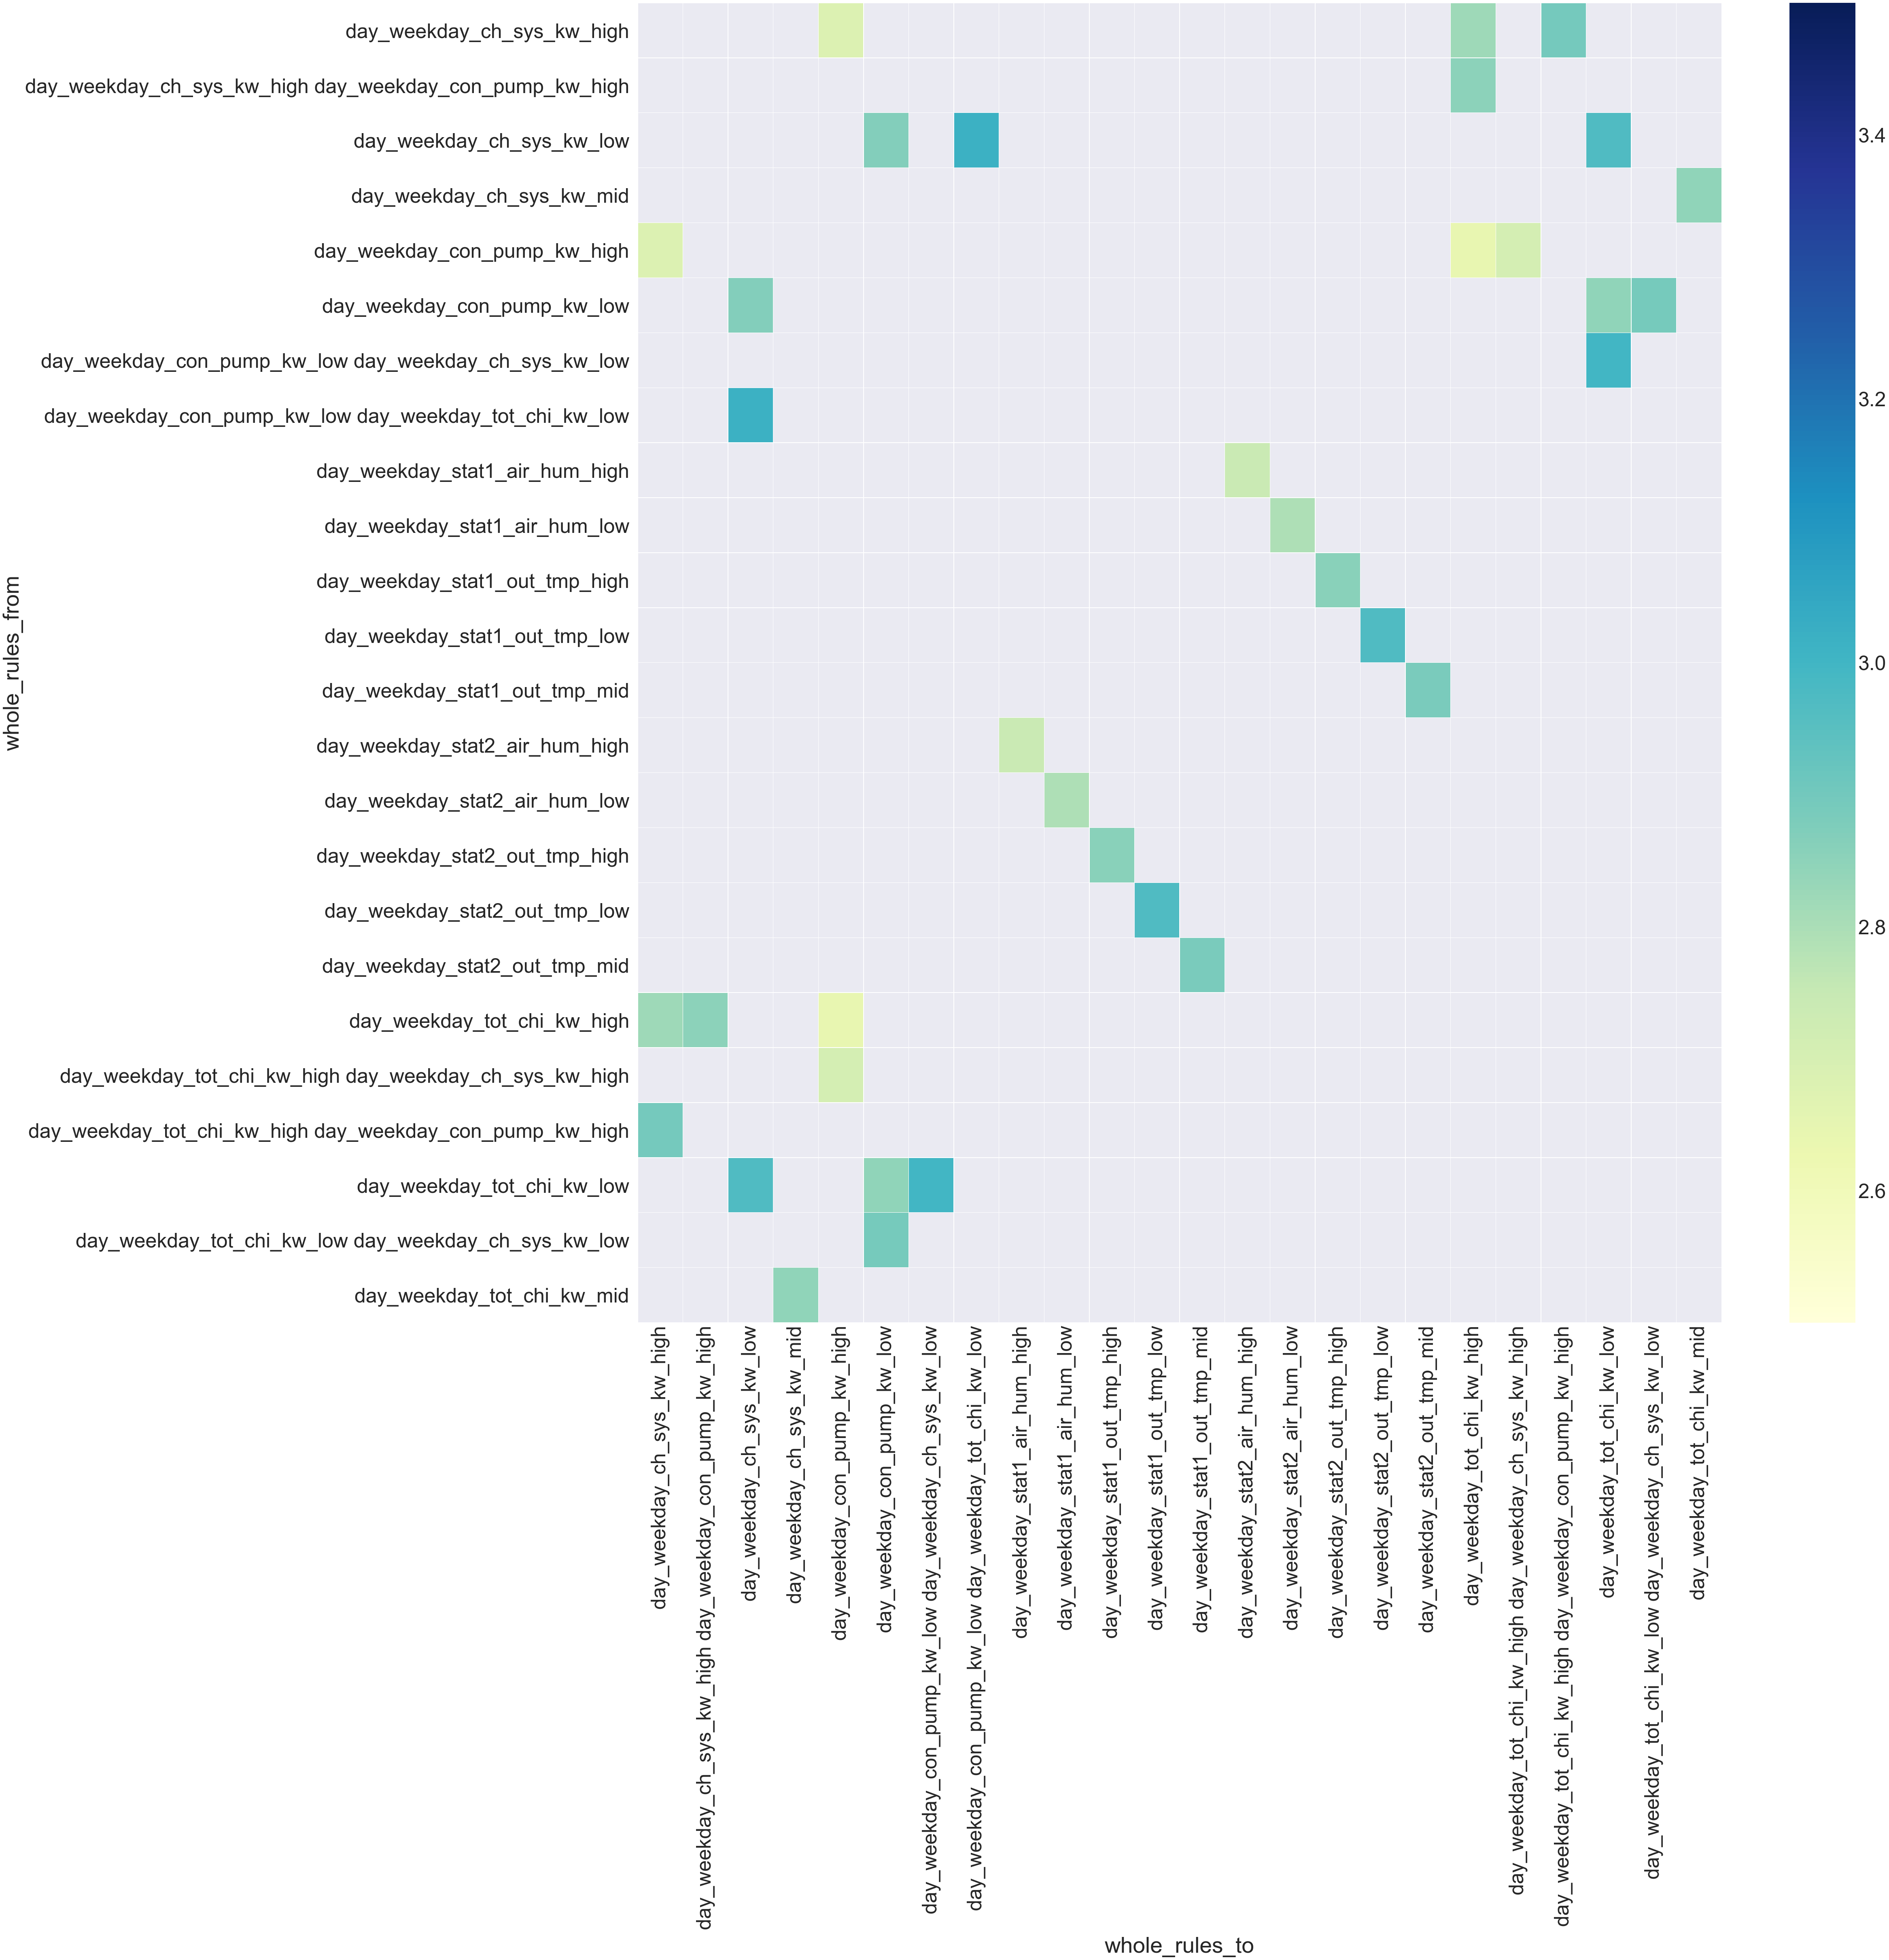

In [5]:
### SAX_day_weekday_cp_sys.basket
data = Orange.data.Table('SAX_day_weekday_cp_sys.basket')
rules = Orange.associate.AssociationRulesSparseInducer(data, support=0.3)
print "%4s %4s %4s %4s" % ("Supp", "Conf", "Lift", "Rule")
for r in rules:
    print "%4.1f %4.1f %4.1f  %s" % (r.support, r.confidence, r.lift, r)

result_rules = [(r.support, r.confidence, r.lift, str(r).split('->')) for r in rules]
result_rules = sorted(result_rules, key=itemgetter(3))
rules_from = []
rules_to = []
rules_lift = []
for i in range(len(result_rules)):
    rules_from.append(result_rules[i][3][0])
    rules_to.append(result_rules[i][3][1])
    rules_lift.append(result_rules[i][2])
whole_rules_df = pd.DataFrame({'whole_rules_from':rules_from,
                              'whole_rules_to':rules_to,
                              'whole_rules_lift':rules_lift})
whole_pt = whole_rules_df.pivot_table(index='whole_rules_from', columns='whole_rules_to', values='whole_rules_lift', aggfunc=np.sum)
f, ax = plt.subplots(figsize=(60,60))
sns.set(font_scale=5)
one_heat = sns.heatmap(whole_pt,fmt="d",cmap='YlGnBu',linewidths=.5, ax=ax,vmin=2.5,vmax=3.5)
one_heat.get_figure().savefig('SAX_day_weekday_cp_sys.png',bbox_inches="tight")

[(0.3325031101703644, 0.9780219793319702, 2.8767459392547607, ['day_weekend_ch_sys_kw_high ', ' day_weekend_tot_chi_kw_high']), (0.32067248225212097, 0.9716981053352356, 2.9444284439086914, ['day_weekend_ch_sys_kw_low ', ' day_weekend_tot_chi_kw_low']), (0.3132005035877228, 0.9490566253662109, 2.8758206367492676, ['day_weekend_ch_sys_kw_mid ', ' day_weekend_tot_chi_kw_mid']), (0.314445823431015, 0.9249083995819092, 2.720518112182617, ['day_weekend_stat1_air_hum_high ', ' day_weekend_stat2_air_hum_high']), (0.330635130405426, 0.9725274443626404, 2.8605844974517822, ['day_weekend_stat1_out_tmp_high ', ' day_weekend_stat2_out_tmp_high']), (0.32440847158432007, 0.9830188751220703, 2.9787325859069824, ['day_weekend_stat1_out_tmp_low ', ' day_weekend_stat2_out_tmp_low']), (0.31631383299827576, 0.9584905505180359, 2.904407262802124, ['day_weekend_stat1_out_tmp_mid ', ' day_weekend_stat2_out_tmp_mid']), (0.314445823431015, 0.9249083995819092, 2.720518112182617, ['day_weekend_stat2_air_hum_high

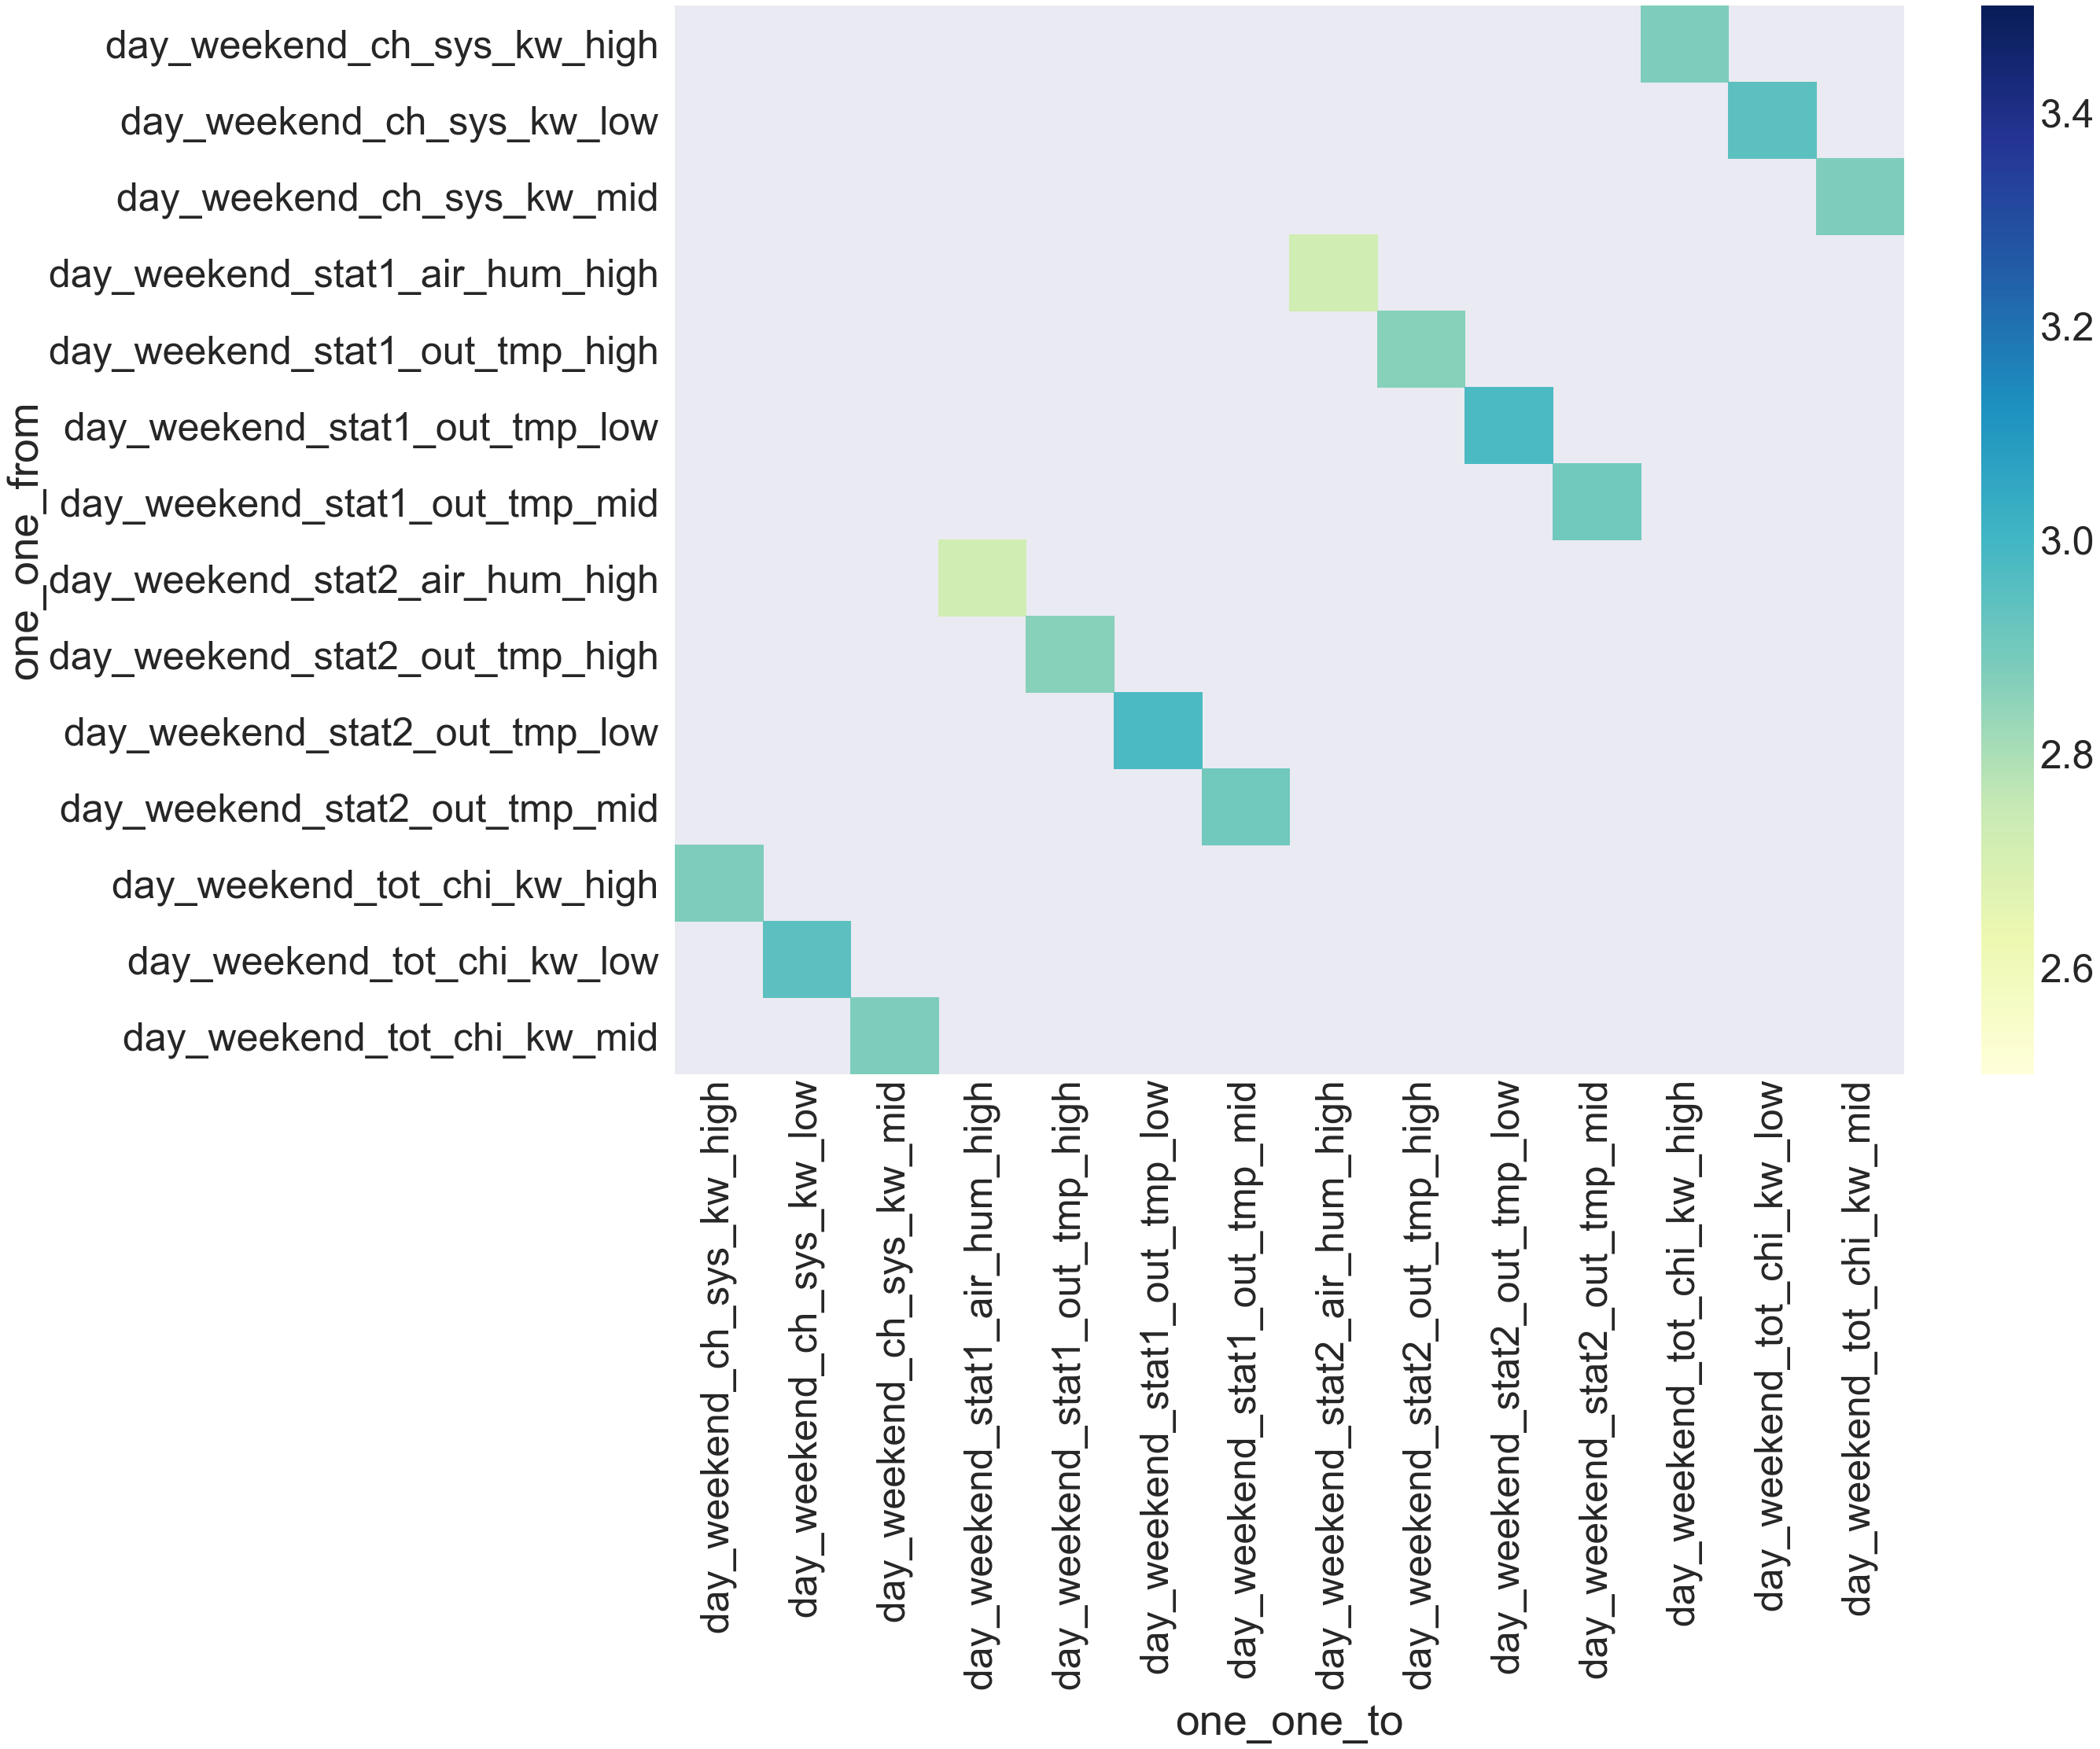

In [8]:
### one to one rules
one_one_rules = []
for i in range(len(result_rules)):
    if(len(result_rules[i][3][0].split(' '))==2 and len(result_rules[i][3][1].split(' '))==2):
        one_one_rules.append(result_rules[i])
print(one_one_rules)
### manipulate the one_one_rules to datafram
one_one_from = []
one_one_to = []
one_one_value = []
for i in range(len(one_one_rules)):
    one_one_from.append(one_one_rules[i][3][0])
    one_one_to.append(one_one_rules[i][3][1])
    one_one_value.append(one_one_rules[i][2])
one_one_df = pd.DataFrame({'one_one_from':one_one_from,
                           'one_one_to':one_one_to,
                           'one_one_value':one_one_value})
one_one_df.head()
pt = one_one_df.pivot_table(index='one_one_from', columns='one_one_to', values='one_one_value', aggfunc=np.sum)
f, ax = plt.subplots(figsize=(35, 25))
sns.set(font_scale=5)
one_one_rules = sns.heatmap(pt, fmt="d",cmap='YlGnBu', ax=ax,vmin=2.5,vmax=3.5)
one_one_rules.get_figure().savefig("one_SAX_day_weekday_cp_sys.png",bbox_inches="tight")

Supp Conf Lift Rule
 0.3  1.0  2.9  day_weekend_tot_chi_kw_high -> day_weekend_ch_sys_kw_high
 0.3  1.0  2.9  day_weekend_ch_sys_kw_high -> day_weekend_tot_chi_kw_high
 0.3  1.0  3.0  day_weekend_stat2_out_tmp_low -> day_weekend_stat1_out_tmp_low
 0.3  1.0  3.0  day_weekend_stat1_out_tmp_low -> day_weekend_stat2_out_tmp_low
 0.3  0.9  2.9  day_weekend_tot_chi_kw_mid -> day_weekend_ch_sys_kw_mid
 0.3  0.9  2.9  day_weekend_ch_sys_kw_mid -> day_weekend_tot_chi_kw_mid
 0.3  1.0  2.9  day_weekend_stat2_out_tmp_mid -> day_weekend_stat1_out_tmp_mid
 0.3  1.0  2.9  day_weekend_stat1_out_tmp_mid -> day_weekend_stat2_out_tmp_mid
 0.3  0.9  2.7  day_weekend_stat2_air_hum_high -> day_weekend_stat1_air_hum_high
 0.3  0.9  2.7  day_weekend_stat1_air_hum_high -> day_weekend_stat2_air_hum_high
 0.3  1.0  2.9  day_weekend_stat2_out_tmp_high -> day_weekend_stat1_out_tmp_high
 0.3  1.0  2.9  day_weekend_stat1_out_tmp_high -> day_weekend_stat2_out_tmp_high
 0.3  1.0  2.9  day_weekend_tot_chi_kw_low -> da

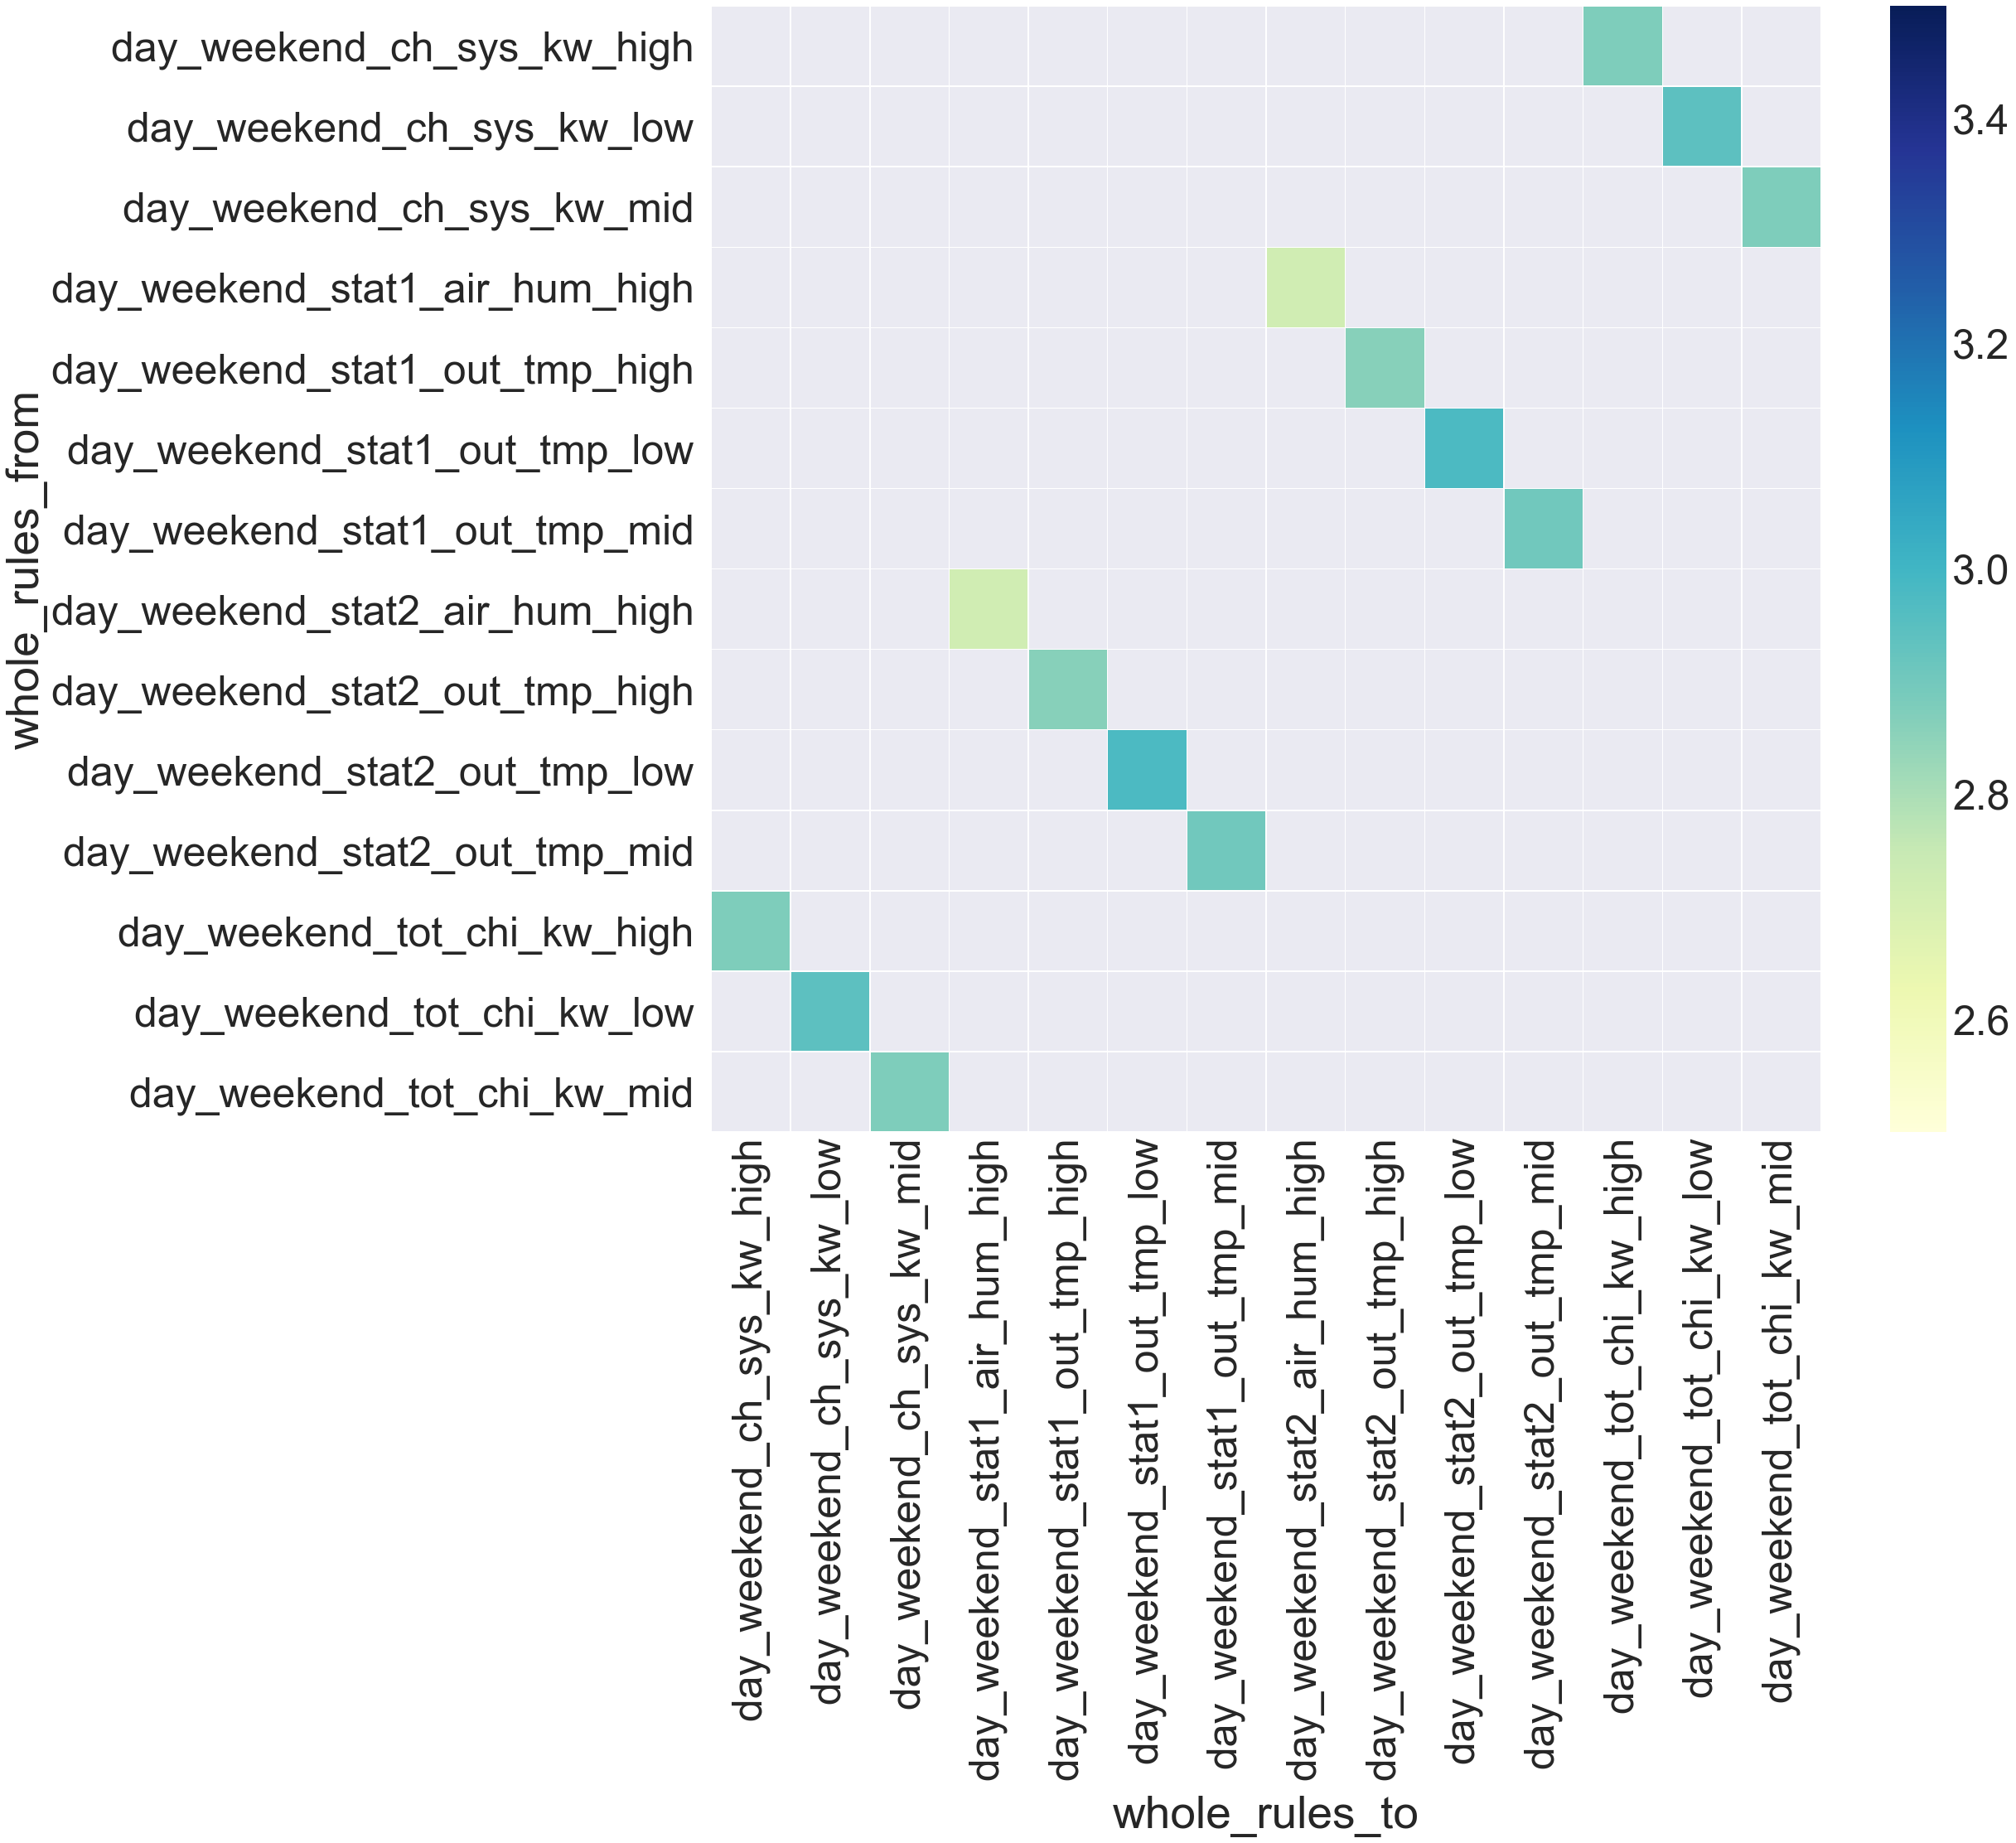

In [7]:
### SAX_day_weekend_cp_sys.basket
data = Orange.data.Table('SAX_day_weekend_cp_sys.basket')
rules = Orange.associate.AssociationRulesSparseInducer(data, support=0.3)
print "%4s %4s %4s %4s" % ("Supp", "Conf", "Lift", "Rule")
for r in rules:
    print "%4.1f %4.1f %4.1f  %s" % (r.support, r.confidence, r.lift, r)

result_rules = [(r.support, r.confidence, r.lift, str(r).split('->')) for r in rules]
result_rules = sorted(result_rules, key=itemgetter(3))
rules_from = []
rules_to = []
rules_lift = []
for i in range(len(result_rules)):
    rules_from.append(result_rules[i][3][0])
    rules_to.append(result_rules[i][3][1])
    rules_lift.append(result_rules[i][2])
whole_rules_df = pd.DataFrame({'whole_rules_from':rules_from,
                              'whole_rules_to':rules_to,
                              'whole_rules_lift':rules_lift})
whole_pt = whole_rules_df.pivot_table(index='whole_rules_from', columns='whole_rules_to', values='whole_rules_lift', aggfunc=np.sum)
f, ax = plt.subplots(figsize=(30,25))
sns.set(font_scale=5)
one_heat = sns.heatmap(whole_pt,fmt="d",cmap='YlGnBu',linewidths=.5, ax=ax,vmin=2.5,vmax=3.5)
one_heat.get_figure().savefig('one_SAX_day_weekend_cp_sys.png',bbox_inches="tight")